# Emotion Color Association Analysis

##### This Jupyter notebook is designed to analyze the association between different emotions and colors. The data used in this notebook is based on a research study that asked participants to associate colors with specific emotion words. The results of this study have been compiled into a CSV file, where each row represents a color associated with an emotion word, along with the frequency and percentage of that association.

##### By the end of this notebook, we will have a clear understanding of how different emotions are associated with different colors, and we will have a preprocessed dataset that can be used to train a machine learning model to predict emotions based on colors.

### Load the data 
- Load into a DataFrame
- Print the first few rows of the DataFrame

In [1]:
import pandas as pd

# Load the Data
negative_df = pd.read_csv('negative_emotion_words.csv')
positive_df = pd.read_csv('positive_emotion_words.csv')

# Count unique words and colors in negative emotions
negative_unique_words = negative_df['Word'].nunique()
negative_unique_colors = negative_df['Color'].nunique()

# Count unique words and colors in positive emotions
positive_unique_words = positive_df['Word'].nunique()
positive_unique_colors = positive_df['Color'].nunique()

# Print the results
print(f'Negative Emotions: {negative_unique_words},      Unique colors = {negative_unique_colors}')
print(f'Positive Emotions: {positive_unique_words},      Unique colors = {positive_unique_colors}')

Negative Emotions: 36,      Unique colors = 50
Positive Emotions: 29,      Unique colors = 53


### Data Analysis on "negative_emotion_words.csv"

In [2]:
import pandas as pd

# Load the Data
negative_df = pd.read_csv('negative_emotion_words.csv')

# Ensure 'Percentage' is of string type
negative_df['Percentage'] = negative_df['Percentage'].astype(str)

# Convert 'Percentage' to numerical format
negative_df['Percentage'] = pd.to_numeric(negative_df['Percentage'].str.rstrip('%'), errors='coerce') / 100.0

# Convert 'Freq' to numerical format
negative_df['Freq'] = pd.to_numeric(negative_df['Freq'], errors='coerce')

# Create a Function to Map Colors to Negative Emotions and Rank Them by Frequency
def rank_emotions_by_color_negative():
    # Get unique colors
    unique_colors = negative_df['Color'].unique()
    
    # For each color, get associated emotions and rank them by frequency
    for color in unique_colors:
        print(f'Color: {color}')
        emotions = negative_df[negative_df['Color'] == color]
        ranked_emotions = emotions.sort_values('Freq', ascending=False)
        # Reset index and drop the old one
        ranked_emotions = ranked_emotions.reset_index(drop=True)
        print(ranked_emotions[['Word', 'Freq', 'Percentage']])
        print('\n')

# Call the function
rank_emotions_by_color_negative()

Color: Black
           Word  Freq  Percentage
0      Dreadful  54.0        0.53
1        Afraid  50.0        0.50
2         Agony  49.0        0.49
3        Misery  47.0        0.47
4     Terrified  36.0        0.36
5          Fear  34.0        0.33
6         Cruel  34.0        0.34
7     Depressed  31.0        0.31
8        Scared  31.0        0.31
9     Regretful  28.0        0.28
10      Hostile  26.0        0.26
11  Discouraged  25.0        0.25
12     Helpless  24.0        0.24
13     Contempt  19.0        0.19
14      Unhappy  19.0        0.19
15          Sad  19.0        0.19
16        Tense  18.0        0.18
17    Disgusted  18.0        0.18
18   Frustrated  17.0        0.17
19       Guilty  16.0        0.16
20       Lonely  16.0        0.16
21      Enraged  15.0        0.15
22   Suspicious  14.0        0.14
23       Shamed  14.0        0.14
24        Upset  14.0        0.14
25        Angry  14.0        0.14
26        Moody  13.0        0.13
27          Mad  13.0        0.13
2

### Data Analysis on "positive_emotion_words.csv"

In [3]:
import pandas as pd

# Load the Data
positive_df = pd.read_csv('positive_emotion_words.csv')

# Ensure 'Percentage' is of string type
positive_df['Percentage'] = positive_df['Percentage'].astype(str)

# Convert 'Percentage' to numerical format
positive_df['Percentage'] = pd.to_numeric(positive_df['Percentage'].str.rstrip('%'), errors='coerce') / 100.0

# Convert 'Freq' to numerical format
positive_df['Freq'] = pd.to_numeric(positive_df['Freq'], errors='coerce')

# Create a Function to Map Colors to Positive Emotions and Rank Them by Frequency
def rank_emotions_by_color(colors):
    # For each color, get associated emotions and rank them by frequency
    for color in colors:
        print(f'Color: {color}')
        emotions = positive_df[positive_df['Color'] == color]
        ranked_emotions = emotions.sort_values('Freq', ascending=False)
        # Reset index and drop the old one
        ranked_emotions = ranked_emotions.reset_index(drop=True)
        print(ranked_emotions[['Word', 'Freq', 'Percentage']])
        print('\n')

# Call the function with a list of dominant colors
dominant_colors = ['Red', 'Silver', 'Green']  # replace with your actual dominant colors
rank_emotions_by_color(dominant_colors)

Color: Red
          Word  Freq  Percentage
0      Passion    79        0.77
1         Love    77        0.76
2         Lust    69        0.68
3        Merry    65        0.65
4      Aroused    63        0.63
5    Affection    49        0.49
6      Admired    43        0.43
7        Brave    36        0.36
8    Surprised    32        0.32
9    Confident    32        0.31
10       Cheer    24        0.24
11  Triumphant    22        0.22
12         Joy    21        0.21
13      Joyful    21        0.21
14       Proud    21        0.21
15   Satisfied    18        0.18
16  Astonished    18        0.18
17       Happy    17        0.17
18    Inspired    15        0.15
19      Secure    14        0.14
20    Friendly    11        0.11
21      Elated     9        0.09
22    Grateful     7        0.07
23   Beautiful     6        0.06
24     Hopeful     5        0.05
25        Safe     5        0.05
26        Kind     5        0.05
27        Nice     5        0.05
28     Relaxed     4        0.04

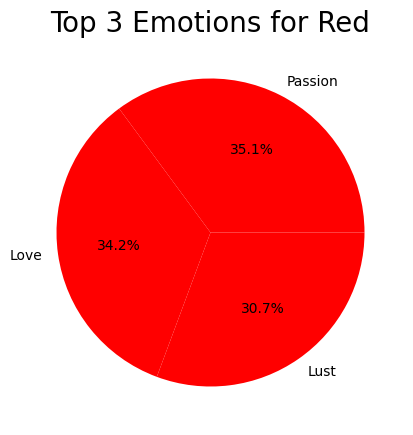

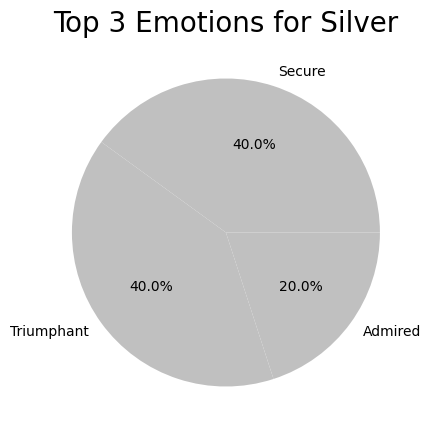

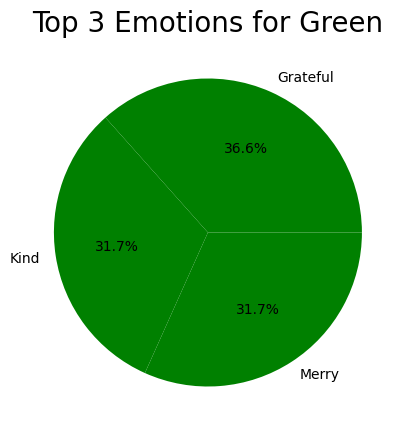

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_emotions(colors):
    for color in colors:
        emotions = positive_df[positive_df['Color'] == color]
        ranked_emotions = emotions.sort_values('Freq', ascending=False)
        top_emotions = ranked_emotions.head(3)
        
        plt.figure(figsize=(10, 5))
        plt.pie(top_emotions['Freq'], labels=top_emotions['Word'], colors=[color.lower()]*3, autopct='%1.1f%%')
        plt.title(f'Top 3 Emotions for {color}', fontsize=20)
        
        plt.show()

# Call the function with a list of dominant colors
plot_top_emotions(dominant_colors)

### Data Preprocessing 
Preprocess the data for machine learning. This includes converting the color names into numerical values using one-hot encoding.

